In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
from datetime import timedelta
from timple.timedelta import strftimedelta
from fastf1 import plotting
import datetime


In [2]:
ff1.Cache.enable_cache('../cache') 
jeddah = ff1.get_session(2023, 'Saudi Arabian','R')
plotting.setup_mpl()
jeddah.load()


core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/home/thalles/.local/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/home/thalles/.local/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/home/t

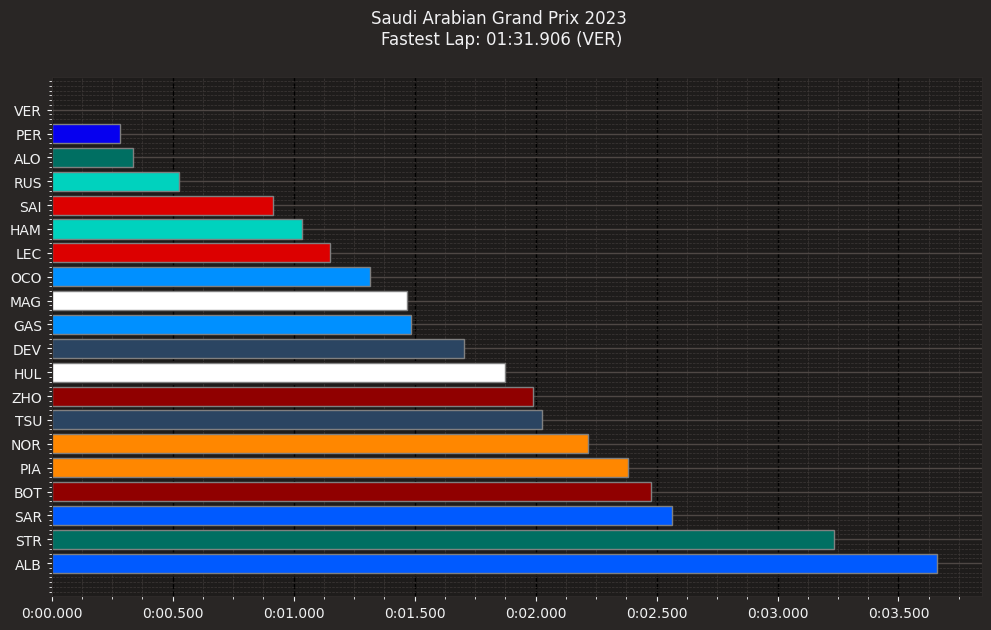

In [3]:
list_fastest_laps = list()    
for drv in jeddah.results['Abbreviation']:
        drvs_fastest_lap = jeddah.laps.pick_driver(drv).pick_fastest()
        list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

    # plot is nicer to look at and more easily understandable if we just plot the time differences.
    #  Therefore we subtract the fastest lap time from all other lap times.
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)


    
fig, ax = plt.subplots(figsize=(12, 6.75))
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

    # show fastest at the top
ax.invert_yaxis()

    # draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{jeddah.event['EventName']} {jeddah.event.year} \n"
                f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

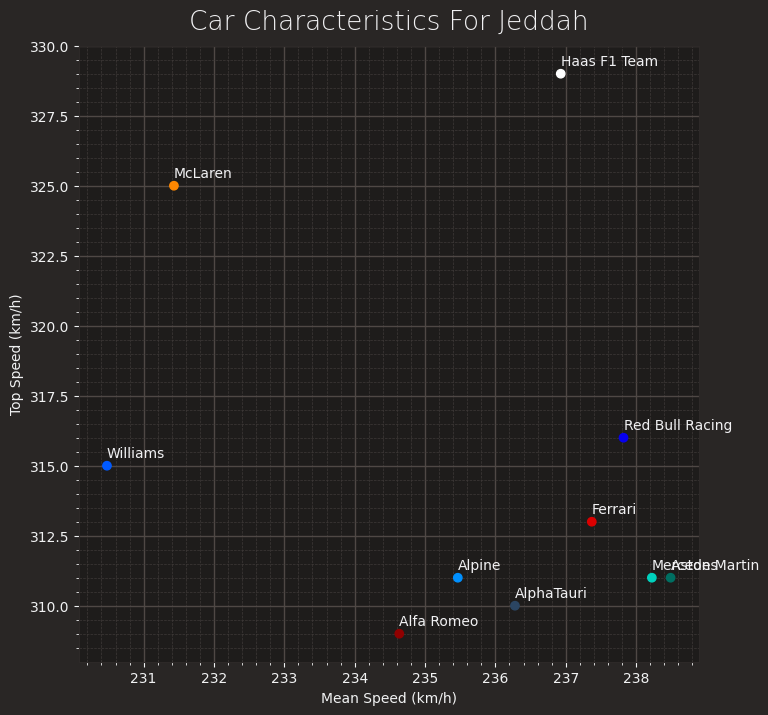

In [4]:
laps = jeddah.laps
df = laps[['Driver', 'LapTime', 'Team']]
df = df.loc[df.groupby('Team')['LapTime'].idxmin()].sort_values('LapTime')
plt.rcParams["figure.figsize"] = [8, 8]
fig, ax = plt.subplots()
high_speed = []
for drv in df['Driver']:
    telemetry = laps.pick_driver(drv).pick_fastest().get_telemetry()
    color = ff1.plotting.team_color(laps.pick_driver(drv)['Team'].reset_index(drop = True)[0])
    telemetry = laps.pick_driver(drv).pick_fastest().get_telemetry()
    high_speed.append((telemetry['Speed'].mean(),color, telemetry['Speed'].max(), laps.pick_driver(drv)['Team'].reset_index(drop = True)[0]))

ax.set(xlabel='Mean Speed (km/h)', ylabel= 'Top Speed (km/h)')
plt.scatter(list(zip(*high_speed))[0],list(zip(*high_speed))[2], color = list(zip(*high_speed))[1])

for i in range(len(high_speed)):
    ax.annotate(list(zip(*high_speed))[3][i], (list(zip(*high_speed))[0][i], list(zip(*high_speed))[2][i] + 0.3))

plt.title("Car Characteristics For Jeddah")
plt.savefig('car_characteristics', dpi=350)

/tmp/ipykernel_10921/2263213915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_laps['LapTimeSeconds'] = driver_laps['Time'].dt.total_seconds()
/tmp/ipykernel_10921/2263213915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_laps['LapTimeSeconds'] = driver_laps['Time'].dt.total_seconds()
/tmp/ipykernel_10921/2263213915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

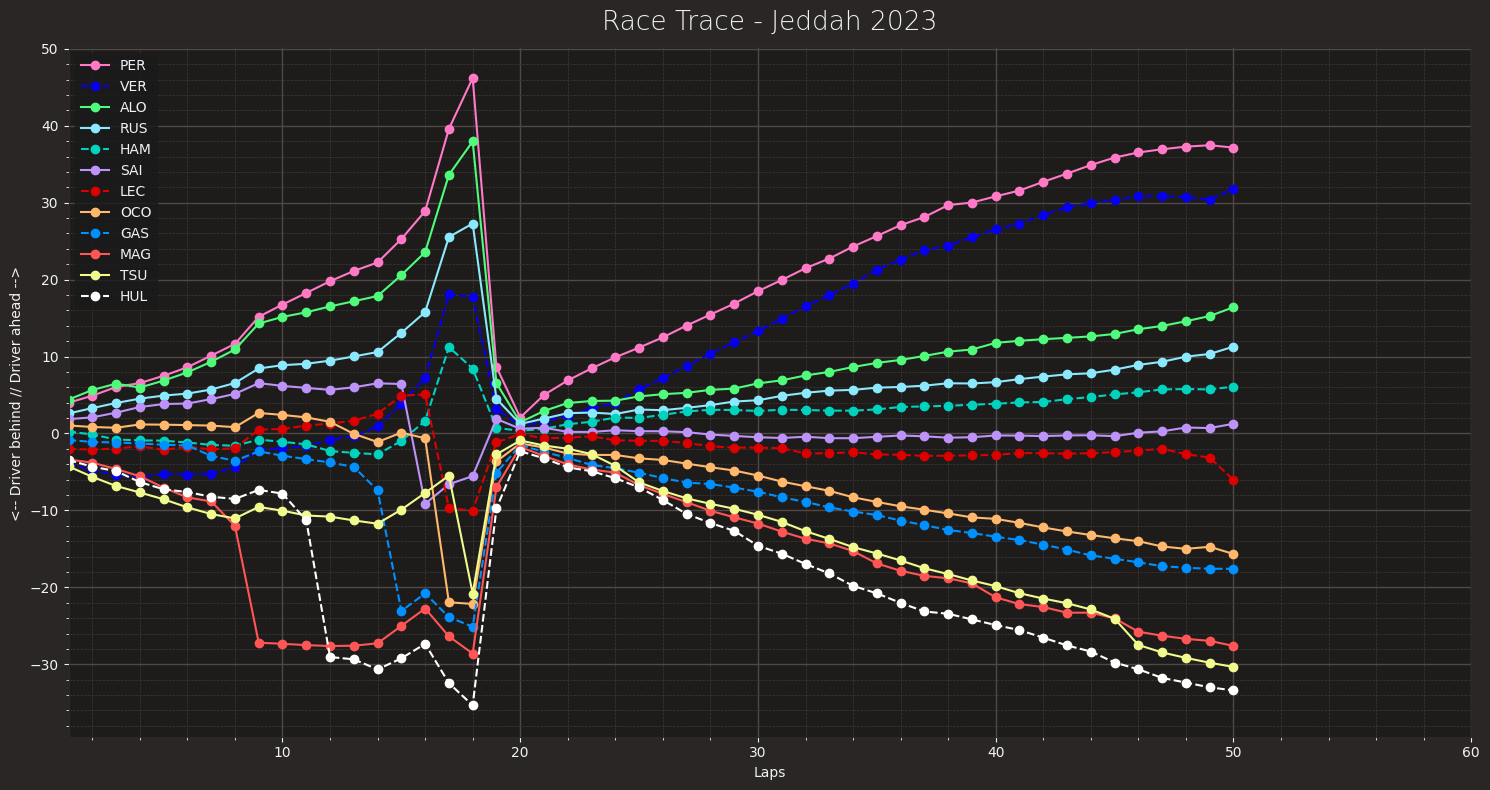

In [5]:
average_driver_laptime = []
for driver in jeddah.results['Abbreviation'][1:10]:
    driver_laps = jeddah.laps.pick_driver(driver)
    driver_laps['LapTimeSeconds'] = driver_laps['Time'].dt.total_seconds()
    average_driver_laptime.append(driver_laps['LapTimeSeconds'].reset_index(drop = True))
virtual_driver = pd.DataFrame(average_driver_laptime)

plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
color_list = []

for driver in jeddah.results['Abbreviation'][:12]:
    driver_laps = jeddah.laps.pick_driver(driver)
    driver_laps['LapTimeSeconds'] = driver_laps['Time'].dt.total_seconds()
    color = ff1.plotting.team_color(driver_laps['Team'].reset_index(drop = True)[0])
    if color in color_list:
        ax.plot(driver_laps['LapNumber'], virtual_driver.mean().reset_index(drop=True)[:len(driver_laps['LapTimeSeconds'])] - driver_laps['LapTimeSeconds'].reset_index(drop=True), marker = 'o', label= driver, color = color, ls='--')
    else:
        ax.plot(driver_laps['LapNumber'], virtual_driver.mean().reset_index(drop=True)[:len(driver_laps['LapTimeSeconds'])] - driver_laps['LapTimeSeconds'].reset_index(drop=True), marker = 'o', label= driver)
    color_list.append(color)

ax.legend(loc="upper left")
ax.set(xlabel='Laps', ylabel= '<-- Driver behind // Driver ahead --> ')
ax.set_xlim(xmin = 1 , xmax= 60)
plt.title("Race Trace - Jeddah 2023")
plt.savefig('Gap_To_Virtual_Driver_Jeddah.png', dpi=350)

    

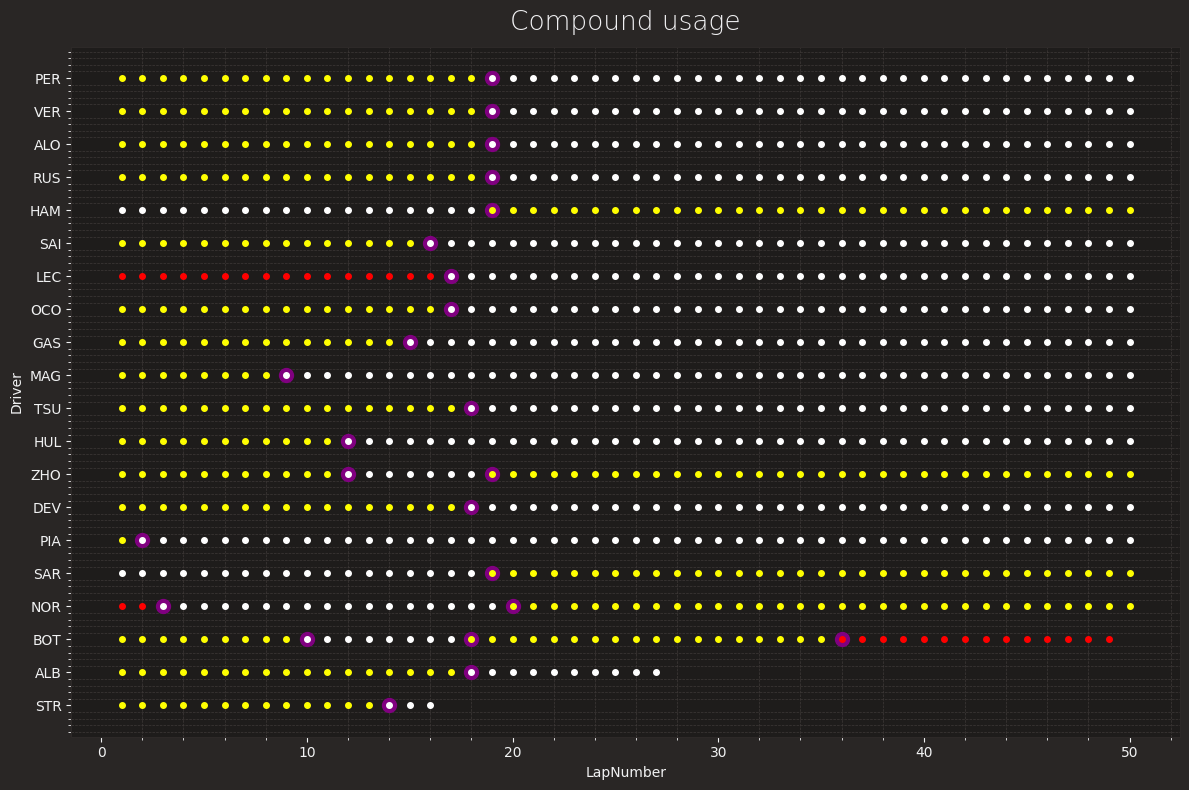

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

pitstops = jeddah.laps[['LapNumber', 'Stint', 'Driver']].copy()
pitstops['Pitstop'] = ~pitstops.Stint.eq(pitstops.Stint.shift())
pitstops = pitstops[pitstops.Pitstop] 
pitstops = pitstops[pitstops.LapNumber > 1]
pitstops.plot.scatter('LapNumber', 'Driver', ax=ax, color='purple', s=100)

df = jeddah.laps[['Driver', 'LapNumber', 'Compound']]
df = pd.merge(jeddah.results[['Abbreviation']], df, left_on='Abbreviation', right_on='Driver')
for tyre,color in zip(['SOFT', 'MEDIUM', 'HARD', 'INTERMEDIATE', 'WET'], ['red', 'yellow', 'white', 'green', 'blue']):
   df = jeddah.laps[jeddah.laps.Compound == tyre][['Driver', 'LapNumber', 'Compound']]
   df.plot.scatter('LapNumber', 'Driver', ax=ax, color=color, s=16)
ax.invert_yaxis()
ax.set_title('Compound usage')
plt.savefig('Jeddah_Strategy.png', dpi=350)
plt.show()

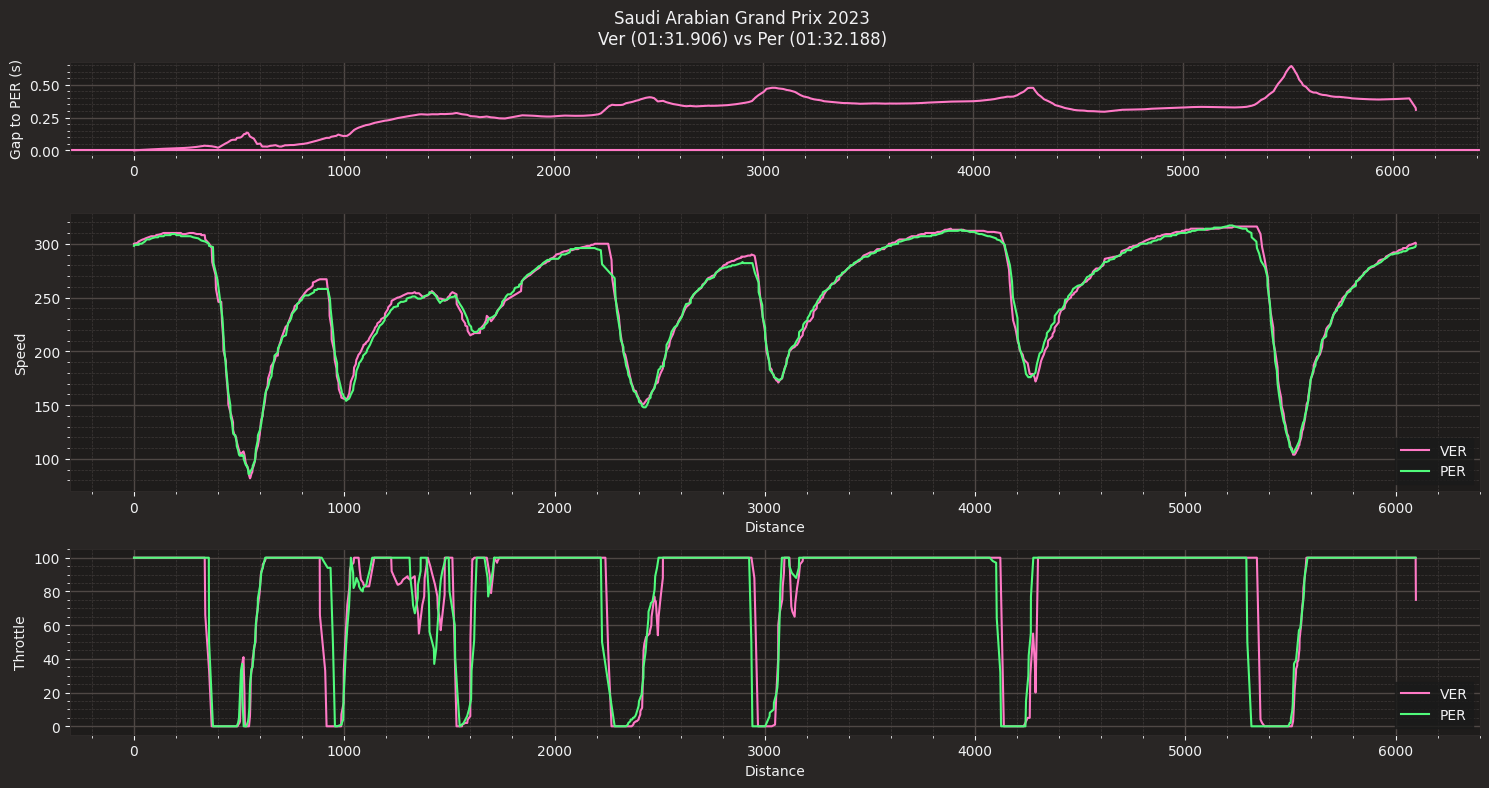

In [7]:
ver_laps = jeddah.laps.pick_driver('VER')
ver_telemetry = ver_laps.pick_fastest().get_telemetry().add_distance()

per_laps = jeddah.laps.pick_driver('PER')
per_telemetry = per_laps.pick_fastest().get_telemetry().add_distance()

delta_time , ref_tel , compare_tel = utils.delta_time( ver_laps.pick_fastest(), per_laps.pick_fastest())

plot_ratios = [1, 3, 2]

fig, ax = plt.subplots(3, gridspec_kw={'height_ratios': plot_ratios})
lap_time_ver_string = strftimedelta(ver_laps.pick_fastest()['LapTime'], '%m:%s.%ms')
lap_time_per_string = strftimedelta(per_laps.pick_fastest()['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{jeddah.event['EventName']} {jeddah.event.year} \n"
                f"Ver ({lap_time_ver_string}) vs Per ({lap_time_per_string}) ")


ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {'PER'} (s)")

ax[1].plot(ver_telemetry['Distance'],ver_telemetry['Speed'], label = 'VER' )
ax[1].plot(per_telemetry['Distance'], per_telemetry['Speed'], label = 'PER')
ax[1].set(ylabel = 'Speed', xlabel = "Distance")
ax[1].legend(loc = "lower right")

ax[2].plot(ver_telemetry['Distance'],ver_telemetry['Throttle'], label = 'VER' )
ax[2].plot(per_telemetry['Distance'], per_telemetry['Throttle'], label = 'PER')
ax[2].set(ylabel = 'Throttle', xlabel = "Distance")
ax[2].legend(loc = "lower right")



fig.savefig('TelemetryVerPer.png')






In [8]:
driver_stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()
print(driver_stints)

   Driver  Stint Compound  LapNumber
0     ALB      1   MEDIUM         17
1     ALB      2     HARD         10
2     ALO      1   MEDIUM         18
3     ALO      2     HARD         32
4     BOT      1   MEDIUM          9
5     BOT      2     HARD          8
6     BOT      3   MEDIUM         18
7     BOT      4     SOFT         14
8     DEV      1   MEDIUM         17
9     DEV      2     HARD         33
10    GAS      1   MEDIUM         14
11    GAS      2     HARD         36
12    HAM      1     HARD         18
13    HAM      2   MEDIUM         32
14    HUL      1   MEDIUM         11
15    HUL      2     HARD         39
16    LEC      1     SOFT         16
17    LEC      2     HARD         34
18    MAG      1   MEDIUM          8
19    MAG      2     HARD         42
20    NOR      1     SOFT          2
21    NOR      2     HARD         17
22    NOR      3   MEDIUM         31
23    OCO      1   MEDIUM         16
24    OCO      2     HARD         34
25    PER      1   MEDIUM         18
2

In [9]:
lec_laps = jeddah.laps.pick_driver('LEC')
lec_tel = lec_laps.get_telemetry()
print(lec_tel[['DRS', 'Speed']][lec_tel.Speed == lec_tel.Speed.max()]['Speed'])


4365    337
Name: Speed, dtype: int64
